#Linear Regression

Let us implement the Linear Regression from scratch. You may run the cells to visualize the results for yourself.

We begin with importing the necessary packages.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import copy
import math
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-1-b752571c79c5>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


**Regression from Scratch**

Let us generate our data randomly. We generate x-values using random number generator and obtain y-values using equation y = 2x - 5 + c. Let us also visualise the created data using a scatter plot.

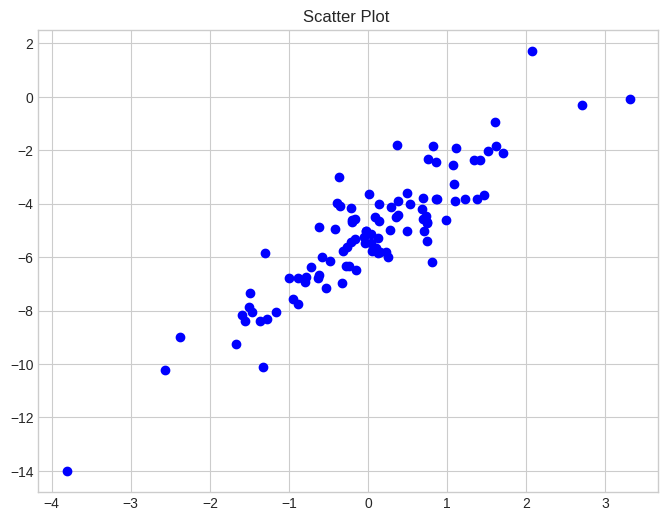

In [3]:
np.random.seed(50)
x = np.random.randn(100)
c=np.random.randn(100)

y = 2*x-5+c
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue')
plt.title('Scatter Plot ')
plt.legend()
plt.show()

In [4]:
x_train, y_train = x , y  # preparing data for training a model.

Let us find the data type of x_train variable.

In [5]:
# print x_train
print("Type of x_train:", type(x_train))
print("First five elements of x_train are:\n", x_train[:5])

Type of x_train: <class 'numpy.ndarray'>
First five elements of x_train are:
 [-1.56035211 -0.0309776  -0.62092842 -1.46458049  1.41194612]


In [7]:
# print y_train
print("Type of y_train:", type(y_train))
print("First five elements of y_train are:\n", y_train[:5])

Type of y_train: <class 'numpy.ndarray'>
First five elements of y_train are:
 [-8.37885314 -5.01479905 -6.668922   -8.05039394 -2.3446823 ]


Lets us find out the shape of our x and y arrays

In [10]:
x_train_shape = x_train.shape# shape of x_train
y_train_shape = y_train.shape # shape of y_train
print ('The shape of x_train is:', x_train_shape)
print ('The shape of y_train is: ', y_train_shape)
print ('Number of training examples (m):', len(x_train))

The shape of x_train is: (100,)
The shape of y_train is:  (100,)
Number of training examples (m): 100


**Computing the Cost Function**

Let us define the cost function to calculate the cost of a predicted output Ypred using the equation y = w*x + b, where (w,b) are variables and x is input.

The cost is calculated as : 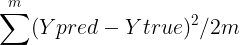

In [20]:
def compute_cost(x, y, w, b):
    m =   len(x_train)# number of training examples
    total_cost = 0
    cost=0
    for i in range(m):
        f_wb = w*x[i] + b # Calculate predicted y value for each sample
        cost += ((f_wb - y[i]) ** 2)  # Calculate squared error (loss) for each sample
          # Sum up the squared errors

    total_cost= cost/(2*m)  # Calculate the mean squared error (average loss)

    return total_cost


Let us check out the cost function in action

In [21]:
initial_w = 2  # Using floating-point values
initial_b = 1  # Using floating-point values
# Computing the cost using initial values for w and b
cost= compute_cost(x_train, y_train, initial_w, initial_b)

print(type(cost))
print(f'Cost at initial w (zeros): {cost:.3f}')

<class 'numpy.float64'>
Cost at initial w (zeros): 19.706


**Computing the Gradient**

Let us write a function to compute the gradient (slope) of our cost function along our variables. You must have come across the following equations while looking up the theory of linear regression. Here the red box is the gradients we are calculating now.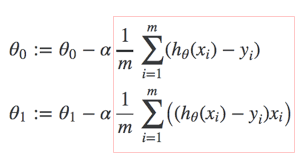

In [22]:
def compute_gradient(x, y, w, b):
    # Number of training examples
    m = x.shape[0]

    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w*x[i]+b
        dj_db += f_wb - y[i]# write these using above function(the red box)
        dj_dw += (f_wb - y[i]) * x[i] # same here
    dj_dw= dj_dw/m
    dj_db=dj_db/m

    return dj_dw, dj_db

Let us check out our gradient function in action

In [24]:
initial_w = 0
initial_b = 0

tmp_dj_dw, tmp_dj_db = compute_gradient(x, y, initial_w, initial_b) # use the compute_gradient function to calculate temporary gradients
print('Gradient at initial w, b (zeros):', tmp_dj_dw, tmp_dj_db)

Gradient at initial w, b (zeros): -2.0265810305314567 5.115762801414911


**Applying Gradient Descent Algorithm from scratch**

Coming to the final part of integrating every part of code we have created, Let us implement the gradient descent algorithm

In [25]:
def gradient_descent(x, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    m = len(x)                                                             # number of training examples
    J_history = []                                                         # An array to store cost J and w's at each iteration — primarily for graphing later
    w_history = []
    w = copy.deepcopy(w_in)                                                # avoid modifying global w within function
    b = b_in

    for i in range(num_iters):

        dj_dw, dj_db = compute_gradient(x_train, y_train, w, b)                    # Compute gradients

        w = w-alpha*dj_dw                                           # Move along the found gradient direction scaled by alpha / changing the values of w and b based on gradients
        b = b-alpha*dj_db

        cost = compute_cost(x,y,w,b)                                      # Now find the new cost using the modified variables w, b using function defined before
        J_history.append(cost)

                                                                           # Print cost after every 10 iterations
        if i% math.ceil(num_iters/10) == 0:
            w_history.append(w)
            print(f"Iteration {i:4}: Cost {float(J_history[-1]):8.2f}   ")

    return w, b, J_history, w_history #return w and J,w history for graphing

Let us see our implementation in ACTION

In [26]:
# initialize fitting parameters. Recall that the shape of w is (n,)
initial_w = 0.
initial_b = 0.

# some gradient descent settings
iterations = 1500
alpha = 0.01

w,b,_,_ = gradient_descent(x_train ,y_train, initial_w, initial_b,
                     compute_cost, compute_gradient, alpha, iterations)
print("w,b found by gradient descent:", w, b)

Iteration    0: Cost    15.44   
Iteration  150: Cost     1.26   
Iteration  300: Cost     0.55   
Iteration  450: Cost     0.51   
Iteration  600: Cost     0.51   
Iteration  750: Cost     0.51   
Iteration  900: Cost     0.51   
Iteration 1050: Cost     0.51   
Iteration 1200: Cost     0.51   
Iteration 1350: Cost     0.51   
w,b found by gradient descent: 1.9263393711168697 -5.1928939311857265


Let us see what our regressed equation predicts for every x

In [27]:
m = x_train.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w * x_train[i] + b

Visualizing our predictions(points on the straight line) against the actual y values. We see how our algorithm found a good fitting line through our data samples.

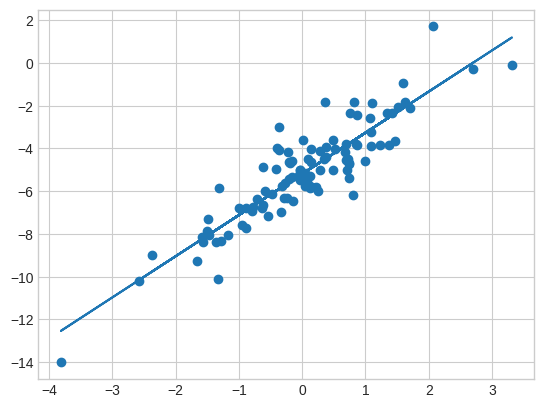

In [28]:
# Plot the linear fit
plt.plot(x_train, predicted)
plt.scatter(x_train, y_train)
# Set the title
# Set the y-axis label
# Set the x-axis label
plt.show()

**Linear Regression Using Scikit-Learn**


We can use Scikit-Learn's `LinearRegression` estimator to fit this data and construct the best-fit line, incorporating our previous implementation all in a few lines of code.

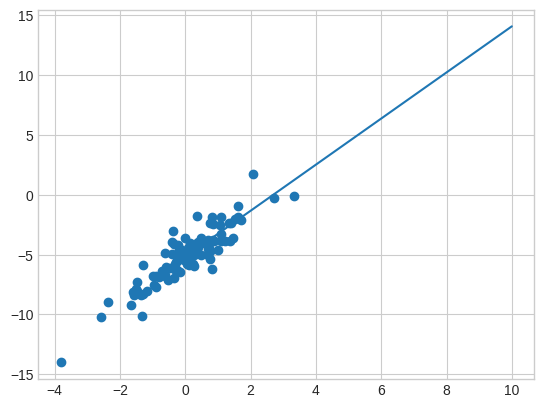

In [29]:
from sklearn.linear_model import LinearRegression
model = LinearRegression(fit_intercept=True)

model.fit(x[:, np.newaxis], y)                 # This fits the line to the same data we used earlier

xfit = np.linspace(0, 10, 1000)
yfit = model.predict(xfit[:, np.newaxis])      # This is used to get the predictions

plt.scatter(x, y)
plt.plot(xfit, yfit);

In [30]:
print("Model slope:    ", model.coef_[0])
print("Model intercept:", model.intercept_)

Model slope:     1.9263397993558125
Model intercept: -5.19289567907173


We see that the results are very close to the values used to generate the data, as we might hope.

**Optional-Material**

Linear Regression in MultiDimension

The `LinearRegression` estimator is much more capable than this, however—in addition to simple straight-line fits, it can also handle multidimensional linear models of the form:
$$
y = a_0 + a_1 x_1 + a_2 x_2 + \cdots
$$
where there are multiple $x$ values.
Geometrically, this is akin to fitting a plane to points in three dimensions, or fitting a hyperplane to points in higher dimensions.

The multidimensional nature of such regressions makes them more difficult to visualize, but we can see one of these fits in action by building some example data, using NumPy's matrix multiplication operator:

In [31]:
rng = np.random.RandomState(1)
X = 10 * rng.rand(100, 3)
y = 0.5 + np.dot(X, [1.5, -2., 1.])

model.fit(X, y)
print(model.intercept_)
print(model.coef_)

0.5000000000000033
[ 1.5 -2.   1. ]


Here the $y$ data is constructed from a linear combination of three random $x$ values, and the linear regression recovers the coefficients used to construct the data.

In this way, we can use the single `LinearRegression` estimator to fit lines, planes, or hyperplanes to our data.
It still appears that this approach would be limited to strictly linear relationships between variables, but it turns out we can relax this as well.